<a name="top"></a>
<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://cdn.miami.edu/_assets-common/images/system/um-logo-gray-bg.png" alt="Miami Logo" style="height: 98px;">
</div>

<h1>MPO 624: EOF analysis of Hourly Rain Rates</h1>


<div style="clear:both"></div>
</div>

<hr style="height:2px;">



In [1]:
import xarray as xr 
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.colors as mplc
# GridSpec lets us align plots carefully 
from matplotlib import gridspec

import scipy.stats as stats
import numpy as np
from numpy.random import rand
from pylab import rcParams, pcolor, show, colorbar, xticks, yticks, title, figure
from scipy.io import loadmat #This allows python to read a Matlab file



In [2]:
#Read in our timeseries
data = loadmat('/Users/newumuser/Documents/GitHub/DATA/rr_timeseries.mat')
coup_rr = data['coup_rr']
lat = data['lat']
lon = data['lon']

lat_10 = lat[:,0]
lat_10_index = np.where((lat_10 <= 10) & (lat_10 >= -10))
lat_index = lat_10_index[0]

lon_60_90 = lon[0,:]
lon_60_90_index = np.where((lon_60_90 <= 90) & (lon_60_90 >= 60))
lon_index = lon_60_90_index[0]

coup_rr_less = coup_rr[:,lat_index[0]:lat_index[-1],lon_index[0]:lon_index[-1]] #only want rain over central Indian Ocean

coup_rr_t = np.mean(np.mean(coup_rr_less,axis=1),axis=1)

t = np.array(range(0,337))
coup_rr.shape

(337, 210, 493)

Text(0.5,1,'Rain Rate, 14 days')

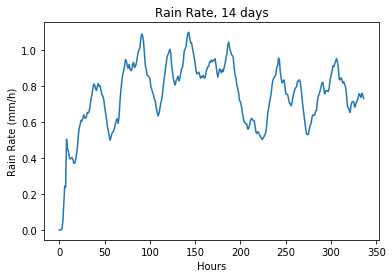

In [3]:
plt.plot(t,coup_rr_t)
plt.xlabel('Hours');plt.ylabel('Rain Rate (mm/h)')
plt.title('Rain Rate, 14 days')


In [4]:
#color map
map1 = np.mat( "255 255 255;245 245 255;235 235 255;224 224 255;214 214 255;204 204 255; \
           194 194 255;184 184 255;173 173 255;163 163 255;153 153 255;143 143 255;133 133 255;\
           122 122 255;112 112 255;102 102 255;92  92 255;82  82 255;71  71 255;61  61 255;\
           51  51 255;41  41 255;31  31 255;20  20 255;10  10 255;0   0 255;0   7 245;\
           1  14 236;1  21 226;1  29 217;2  36 207;2  43 197;2  50 188;3  57 178;\
           3  64 169;3  72 159;4  79 149;4  86 140;4  93 130;4 100 121;5 107 111;5 115 101;\
           5 122  92;6 129  82;6 136  73;6 143  63;7 150  53;7 158  44;7 165  34;8 172  25;\
           8 179  15;18 182  14;29 185  14;39 189  13;49 192  13;59 195  12;70 198  11;\
           80 201  11;90 204  10;101 208   9;111 211   9;121 214   8;132 217   8;142 220   7;\
           152 223   6;162 227   6;173 230   5;183 233   4;193 236   4;204 239   3;214 242   3;\
           224 246   2;234 249   1;245 252   1;255 255   0;255 245   0;255 235   0;255 224   0;\
           255 214   0;255 204   0;255 194   0;255 184   0;255 173   0;255 163   0;255 153   0;\
           255 143   0;255 133   0;255 122   0;255 112   0;255 102   0;255  92   0;255  82   0;\
           255  71   0;255  61   0;255  51   0;255  41   0;255  31   0;255  20   0;255  10   0;\
           255   0   0")/255
map1a = np.array(map1)
c = mplc.ListedColormap(map1a)  

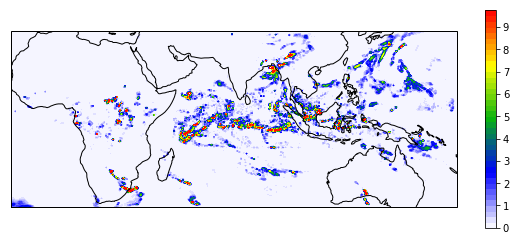

In [5]:
# CartoPy map plot at one time
import cartopy.crs as ccrs
import cartopy.feature as cfeat

fig = plt.figure(figsize=(10, 4))

ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

# Sets the extent to cover the whole globe
# ax.set_global()

sst = ax.contourf(lon, lat, coup_rr[24,:,:],levels = np.arange(0,10,0.25),cmap=c,transform=ccrs.PlateCarree())
ax.add_feature(cfeat.COASTLINE)
plt.colorbar(sst)

## Let's do an EOF analysis the easy way
With a package, from our field
https://openresearchsoftware.metajnl.com/articles/10.5334/jors.122/

In [6]:
from eofs.standard import Eof # import standard eofs from python eofs package, 
                              # to install eofs package use `conda install eofs` in environment you want to add it to
                              # for API see http://ajdawson.github.io/eofs/api/index.html for more information.

In [7]:
# Create an EOF solver to do the EOF analysis. Square-root of cosine of
# latitude weights (area weighting of variance) is applied before the computation of EOFs.
# coslat = np.cos(np.deg2rad(tropiclat))
# wgts = np.sqrt(coslat)[:, np.newaxis]
# solver = Eof( tropics.data, wgts )

# Unweighted (just gridpoint variance)

solver = Eof(coup_rr)

## Having done all the computations, just unpack and plot

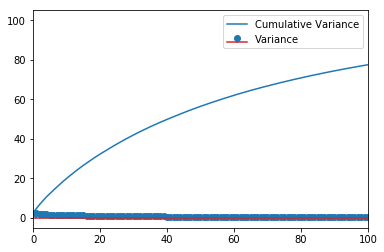

In [8]:
variance=solver.varianceFraction() # this is same as eigenvals/sum(eigenvals)

plt.stem(variance*100.0,label="Variance")
plt.plot(variance.cumsum()*100.0,label="Cumulative Variance")
plt.xlim(0,100,1)
plt.legend()

### Look at the EOF structures and PC time series

In [9]:
# Retrieve the EOFs and PCs
eofs = solver.eofs()
pcs = solver.pcs()

# Retrieve the correlation between the leading PC time series 
# and the input SST anomalies at each grid point.
eofsasCorr = solver.eofsAsCorrelation()

# Retrieve the EOF expressed as the covariance between the leading  PC time series 
# and the input SST anomalies at each grid point.
eofsasCov = solver.eofsAsCovariance()

## Is it a data reduction (compression) yet?

In [10]:
print(np.shape(eofs), np.shape(pcs))
print(np.shape(coup_rr))

(337, 210, 493) (337, 337)
(337, 210, 493)


## Let's look at the modes

In [11]:
def plot_map_ts(xydata,ts,lon,lat,time, label1, label2): 
    fig = plt.figure(figsize=(10, 4))

    ax = fig.add_subplot(121, projection=ccrs.PlateCarree())
    cmap = ax.contourf(lon, lat, xydata, 23, 
                 transform=ccrs.PlateCarree(), 
                 cmap='seismic')
    plt.colorbar(cmap, orientation='horizontal')
    ax.add_feature(cfeat.COASTLINE)
    ax.set_title(label1)
    
    ax2 = fig.add_subplot(122)
    ax2.plot(time, ts) 
    ax2.set_title(label2)

0.0031068546
0.0031075273
0.0031078958
0.003106928


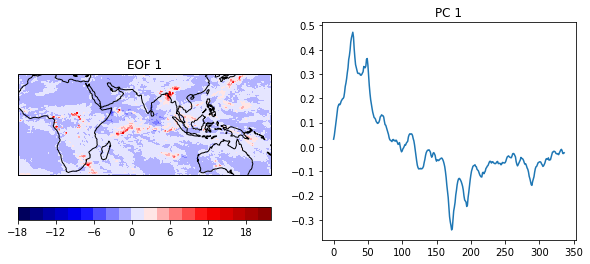

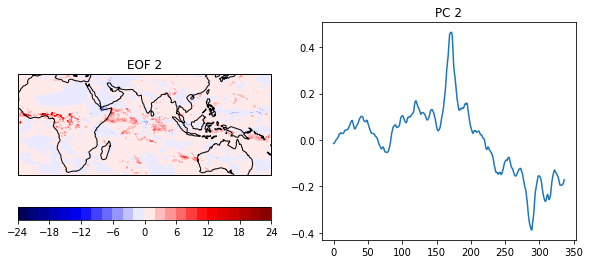

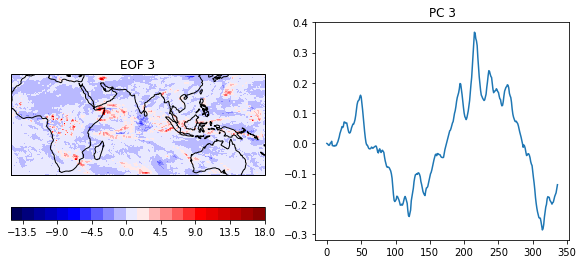

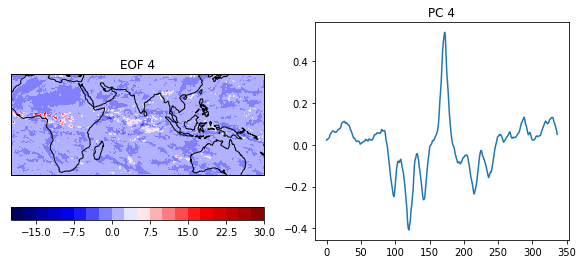

In [12]:
# Put all the magnitude info into the PC for clarity of plotting
for MODE in [0,1,2,3]:
    xystd = np.std(eofs[MODE,:,:].ravel())
    print(xystd)
    plot_map_ts(eofs[MODE,:,:]/xystd, pcs[:,MODE]*xystd,
                                 lon,
                                 lat,
                                 t, 
            'EOF '+str(MODE+1), 'PC '+str(MODE+1))

## Check orthogonality

In [13]:
np.corrcoef(eofs[0,:,:].ravel(), eofs[1,:,:].ravel())

array([[1.00000000e+00, 4.01132047e-04],
       [4.01132047e-04, 1.00000000e+00]])

In [14]:
np.corrcoef(pcs[:,0], pcs[:,1])

array([[1.00000000e+00, 1.39421653e-10],
       [1.39421653e-10, 1.00000000e+00]])

## Truncated reconstructions: animated
Grab some cells from Unidata's workshop notebook on making animations.
You have to make one image, then animate the others

In [15]:
import matplotlib.animation as manimation
plt.rcParams['animation.html'] = 'jshtml'

In [16]:
def recon(TRUNC, t): 
    data = eofs[0,:,:] * pcs[t,0] # Always include the first one
    for i in range(1,TRUNC):
        data += eofs[i,:,:] * pcs[t,i]
    return(data)

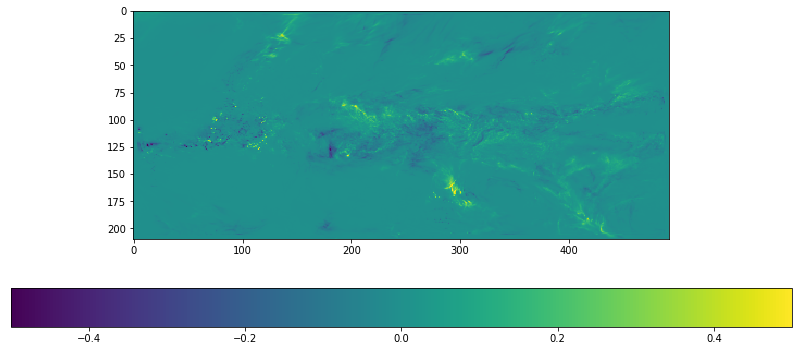

In [17]:
# Make one figure to set the pattern

fig, ax = plt.subplots(figsize=(14,6))

im = ax.imshow(recon(1,0), animated=True, vmin=-0.5, vmax=0.5)
plt.colorbar(im, orientation='horizontal')

In [18]:
TRUNC = 23 ## Reconstruction truncation level (how many modes)

artists = []
for it in range(0, len(pcs[np.arange(0,50,5),0])):   
    im = ax.imshow(recon(TRUNC,it), vmin=-0.5, vmax=0.5)
    ax.set_title('Truncation '+str(TRUNC)+' modes')
    artists.append([im]) # NOTE THE LIST

manimation.ArtistAnimation(fig, artists, interval=500)

In [19]:
TRUNC = 3 ## Reconstruction truncation level (how many modes)

artists = []
for it in range(0, len(pcs[np.arange(0,50,5),0])):   
    im = ax.imshow(recon(TRUNC,it), vmin=-0.5, vmax=0.5)
    ax.set_title('Truncation '+str(TRUNC)+' modes')
    artists.append([im]) # NOTE THE LIST

manimation.ArtistAnimation(fig, artists, interval=500)